# Documentation
## Inputs

## Outputs

## Code Summary
The primary function of this script is to solve for the flexural stress experienced along the top and bottom of the canoe. These are plotted against the flexural resistence to develop plots of the bending moment envelope. This determines whether the canoe will fail in bending.

In [58]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import _canoeValues as cv
import math

#-------------------Inputs-------------------------------------------------------------
input_files = ["Shear_and_Moment_6 Paddlers.csv", "Shear_and_Moment_4 Paddlers.csv", "Shear_and_Moment_3 Paddlers.csv", "Shear_and_Moment_2 Paddlers.csv", "Shear_and_Moment_Display_Stand.csv"]
moment_files = ["Length_vs_Moment_6 Paddler.csv", "Length_vs_Moment_4 Paddler.csv", "Length_vs_Moment_3 Paddler.csv", "Length_vs_Moment_2 Paddler.csv", "Length_vs_Moment_Display_Stand.csv", ]
inner_file = "Inner Hull.csv"
outer_file = "Outer Hull.csv"
compressive_strength = cv.compressive_strength # MPa
tensile_strength = cv.tensile_strength # MPa
#--------------------------------------------------------------------------------------

script_dir = os.path.abspath('data')

file_path = os.path.join(script_dir, inner_file) # file path for the text file input
in_coor = pd.read_csv(file_path, header=None)

file_path = os.path.join(script_dir, outer_file) # file path for the text file input
out_coor = pd.read_csv(file_path, header=None)

# Get inner and outer hull coordinates (station points)
x_in = in_coor[0]
y_in = in_coor[1]
z_in = in_coor[2]

x_out = out_coor[0]
y_out = out_coor[1]
z_out = out_coor[2]

station_no = x_out.nunique() # number of stations
station_out = x_out.unique() # location of each outer hull station station
station_in = x_in.unique()

# Import StationInformation.csv as a dataframe
file_path = os.path.join(script_dir, "Station Information.csv")
canoe_info = pd.read_csv(file_path, header=None)
#<?> 
stations_mm = [x * float(canoe_info[4][1]) for x in range(1,station_no-2,1)]

In [59]:
# print("Max Positive Moments:\n")
# # Loop through each script
# for input_file in input_files:
#     print("\033[4m" + input_file + ":\033[0m")
#     file_path = os.path.join(script_dir, input_file)
#     info = pd.read_csv(file_path, header=None)

#     # Positive Bending Moment
#     value = float(info[1][3])
#     width = float(info[3][3])
#     depth = float(info[4][3])
#     target_station = float(info[2][3])

#     # Extract Station Information
#     Y1_in = []; Z1_in = []
#     Y2_in = []; Z2_in = []
#     Y1_out = []; Z1_out = []
#     Y2_out = []; Z2_out = []

#     for k in range(1,station_no-2,1):
#         if k == target_station:
#             X1_in = station_in[k]
#             X2_in = station_in[k+1]
#             X1_out = station_out[k]
#             X2_out = station_out[k+1]
            
#             for i in range(0,len(x_out),1):
#                 if x_out[i] == X1_out:
#                     Y1_out.append(y_out[i])
#                     Z1_out.append(z_out[i])

#                 elif x_out[i] == X2_out:
#                     Y2_out.append(y_out[i])
#                     Z2_out.append(z_out[i])
                
#                 if x_in[i] == X1_in:
#                     Y1_in.append(y_in[i])
#                     Z1_in.append(z_in[i])

#                 elif x_in[i] == X2_in:
#                     Y2_in.append(y_in[i])
#                     Z2_in.append(z_in[i])

#     # Find y_bar
#     volume = 0
#     product = 0 # y_bar*Volume
#     for i in range(0,len(Y1_out)-1,1):
#         z_i = ((Z1_out[i]+Z1_out[i+1]+Z1_in[i]+Z1_in[i+1])/4 + (Z2_out[i]+Z2_out[i+1]+Z2_in[i]+Z2_in[i+1])/4) /2
#         x = (abs(X1_in-X2_in) + abs(X1_out-X2_out))/2
#         y = (abs(Y1_in[i] - Y1_out[i]) + abs(Y1_in[i+1]-Y1_out[i+1]) + abs(Y2_in[i] - Y2_out[i]) + abs(Y2_in[i+1]-Y2_out[i+1]))/4
#         z = (abs(Z1_out[i+1]-Z1_out[i]) + abs(Z1_in[i+1]-Z1_in[i]) + abs(Z2_out[i+1]-Z2_out[i]) + abs(Z2_in[i+1]-Z2_in[i]))/4

#         volume_i = x * y * z
#         volume += volume_i
#         product += volume_i * z_i
        
#     y_bar_top = abs(product/volume)
#     y_bar_bottom = depth - y_bar_top

#     # Find I
#     I = 0
#     for i in range(0,len(Y1_out)-1,1):
#         z_i = ((Z1_out[i]+Z1_out[i+1]+Z1_in[i]+Z1_in[i+1])/4 + (Z2_out[i]+Z2_out[i+1]+Z2_in[i]+Z2_in[i+1])/4) /2
#         y = (abs(Y1_in[i] - Y1_out[i]) + abs(Y1_in[i+1]-Y1_out[i+1]) + abs(Y2_in[i] - Y2_out[i]) + abs(Y2_in[i+1]-Y2_out[i+1]))/4
#         z = (abs(Z1_out[i+1]-Z1_out[i]) + abs(Z1_in[i+1]-Z1_in[i]) + abs(Z2_out[i+1]-Z2_out[i]) + abs(Z2_in[i+1]-Z2_in[i]))/4
#         I_i = (1/12*y*z**3 + y*z*(abs(z_i) - y_bar_top)**2)/(10**(12)) # [m^4]
#         I = I + I_i

#     stress_top = value*(y_bar_top/1000)/I
#     stress_bottom = value*(y_bar_bottom/1000)/I

#     resistance_top = Top_strength * I / (y_bar_top/1000) * 10**6  # Nm
#     resistance_bottom = Top_strength * I / (y_bar_bottom/1000) * 10**6  # Nm

#     print('Compressive Flexural Stress = ', stress_top/10**6, ' MPa')
#     print('Tensile Flexural Stress = ', stress_bottom/10**6, ' MPa')
#     print("Applied Positive Moment: " + str(value) + ' Nm')
#     print("Resistance Top: " + str(resistance_top) + " Nm")
#     print("Resistance Bottom: " + str(resistance_bottom) + " Nm")
    
#     print("Depth: " + str(depth))
#     print("I: " + str(I))
#     print("Ybar Top: " + str(y_bar_top))
#     print("Ybar Bottom: " + str(y_bar_bottom))
#     # print("\n")
#     print(value, y_bar_top, y_bar_bottom, "\n")

### THE TOP PART OF THE BELOW SECTION APPEARS TO BE A DIRECT COPY OF ABOVE


Positive Moments for Every Station:

Length_vs_Moment_6 Paddler.csv:
Max Compressive Stress Top: -0.012755168596832742 MPa
Max Tensile Stress Top: -0.852619141111603 MPa
Max Compressive Stress Bottom: 1.3246942754162552 MPa
Max Tensile Stress Bottom: 0.03839343463135697 MPa


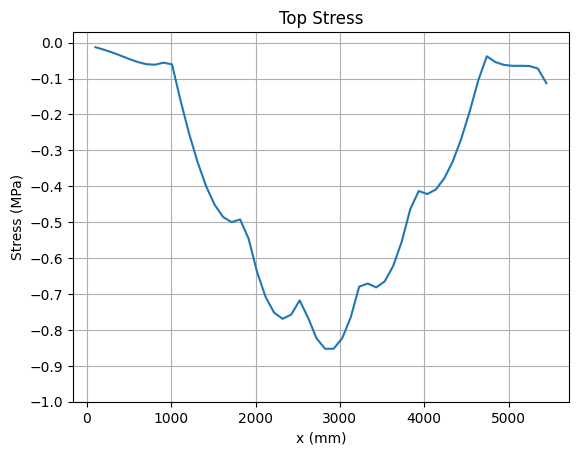

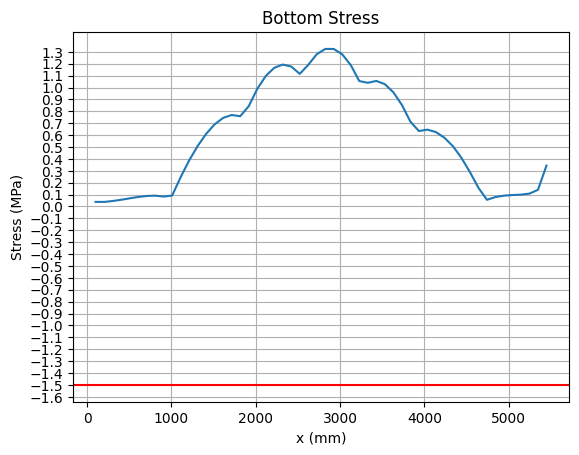

Length_vs_Moment_4 Paddler.csv:
Max Compressive Stress Top: 0.211473772503493 MPa
Max Tensile Stress Top: -0.03291222320465057 MPa
Max Compressive Stress Bottom: 0.05073243135798756 MPa
Max Tensile Stress Bottom: -0.3265680845330386 MPa


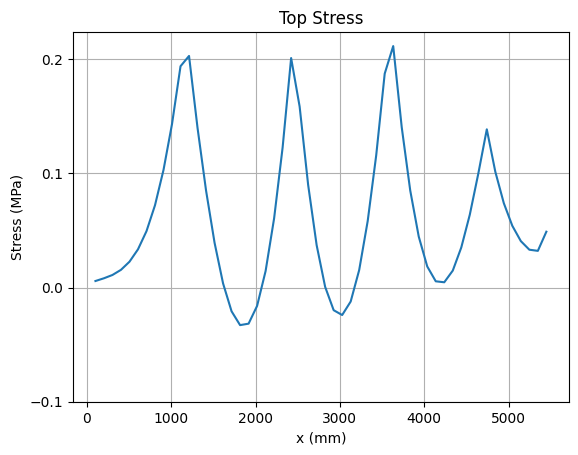

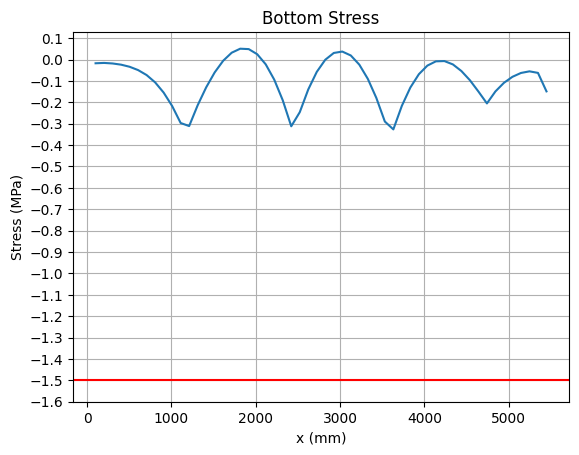

Length_vs_Moment_3 Paddler.csv:
Max Compressive Stress Top: 0.17264336191118654 MPa
Max Tensile Stress Top: -0.21624994314270263 MPa
Max Compressive Stress Bottom: 0.3358747507131528 MPa
Max Tensile Stress Bottom: -0.26501475929204377 MPa


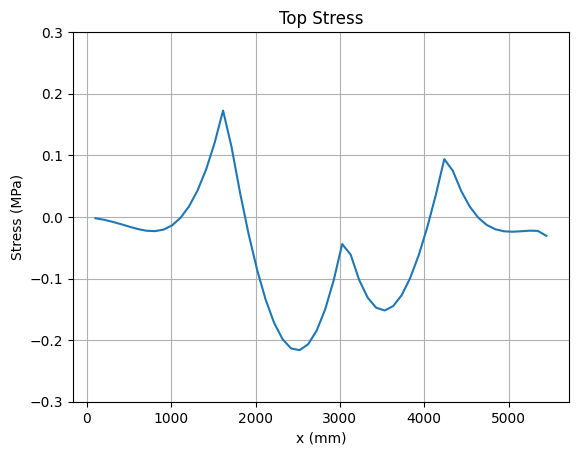

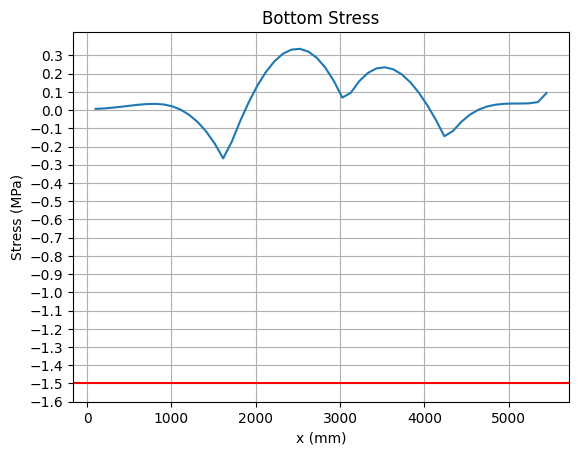

Length_vs_Moment_2 Paddler.csv:
Max Compressive Stress Top: 0.4594875728452635 MPa
Max Tensile Stress Top: -0.07233647914621416 MPa
Max Compressive Stress Bottom: 0.11090865146408665 MPa
Max Tensile Stress Bottom: -0.7068380191046607 MPa


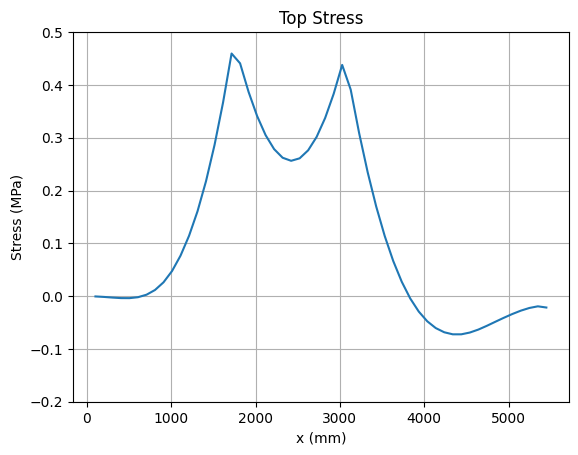

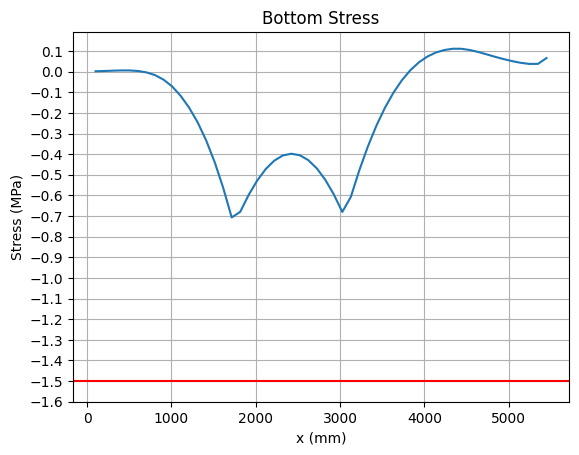

Length_vs_Moment_Display_Stand.csv:
Max Compressive Stress Top: -0.0006880849669778494 MPa
Max Tensile Stress Top: -0.39978109344385826 MPa
Max Compressive Stress Bottom: 0.6173614078612419 MPa
Max Tensile Stress Bottom: 0.002093785151638675 MPa


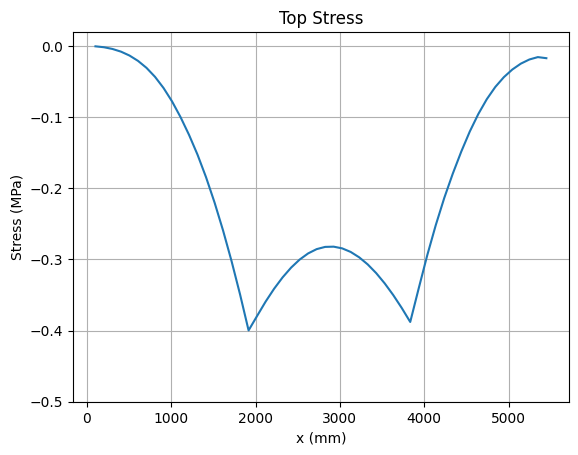

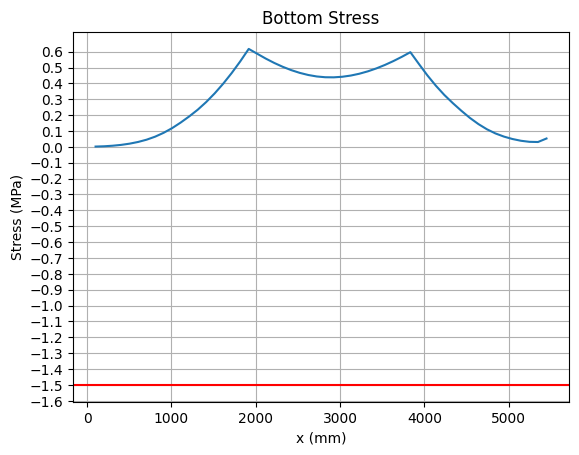

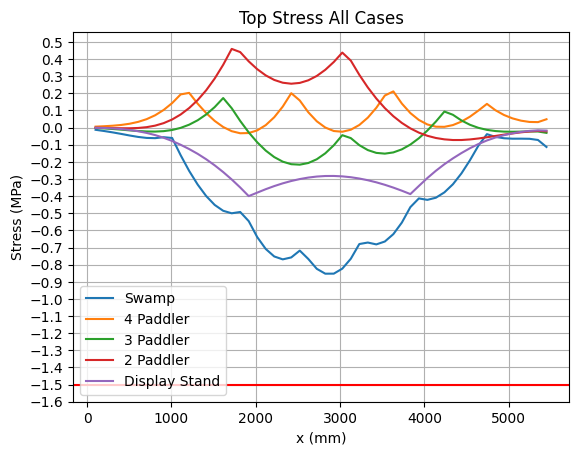

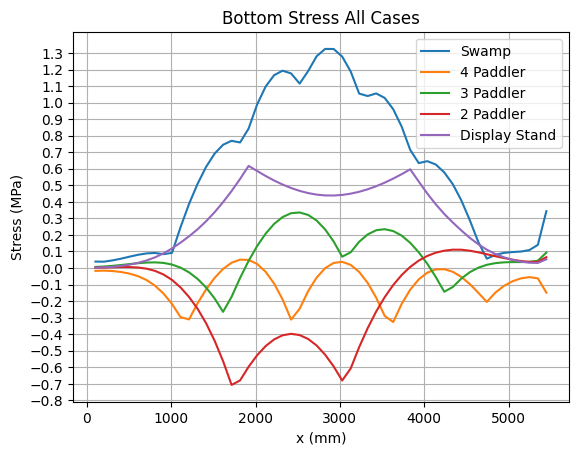

Extrema of Envelope: 1285.0788128779564 -875.225919800985


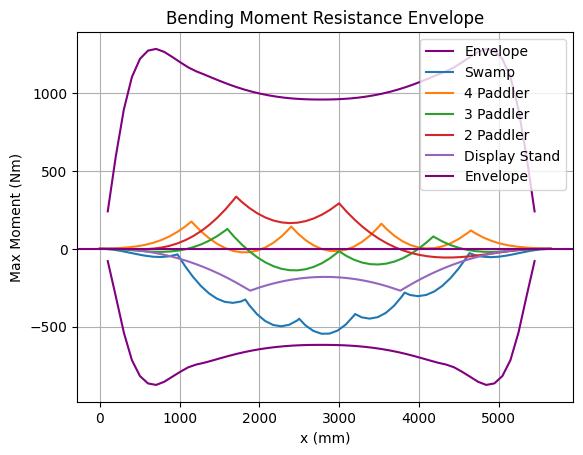

Max Negative Moments:

Shear_and_Moment_6 Paddlers.csv:
Tensile Flexural Stress =  -0.8534823325858708  MPa
Compressive Flexural Stress =  -1.3260353956766564  MPa
Applied Negative Moment: -546.0615093749086 Nm
Stress Top: -853482.3325858708 MPa
Stress Bottom: -1326035.3956766564 MPa
Resistance Top: 8317.453508810137 Nm
Resistance Bottom: 5353.401308153919 Nm


Shear_and_Moment_4 Paddlers.csv:
Tensile Flexural Stress =  -0.03373154053146351  MPa
Compressive Flexural Stress =  -0.0520899259231834  MPa
Applied Negative Moment: -22.688183491329166 Nm
Stress Top: -33731.540531463506 MPa
Stress Bottom: -52089.9259231834 MPa
Resistance Top: 8743.934630325119 Nm
Resistance Bottom: 5662.2538842200365 Nm


Shear_and_Moment_3 Paddlers.csv:
Tensile Flexural Stress =  -0.21664532996417282  MPa
Compressive Flexural Stress =  -0.3364888570022305  MPa
Applied Negative Moment: -139.03863247551087 Nm
Stress Top: -216645.32996417282 MPa
Stress Bottom: -336488.85700223054 MPa
Resistance Top: 8343.1395566

In [60]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import _canoeValues as cv
import math

#-------------------Inputs-------------------------------------------------------------
input_files = ["Shear_and_Moment_6 Paddlers.csv", "Shear_and_Moment_4 Paddlers.csv", "Shear_and_Moment_3 Paddlers.csv", "Shear_and_Moment_2 Paddlers.csv", "Shear_and_Moment_Display_Stand.csv"]
moment_files = ["Length_vs_Moment_6 Paddler.csv", "Length_vs_Moment_4 Paddler.csv", "Length_vs_Moment_3 Paddler.csv", "Length_vs_Moment_2 Paddler.csv", "Length_vs_Moment_Display_Stand.csv", ]
inner_file = "Inner Hull.csv"
outer_file = "Outer Hull.csv"
compressive_strength = cv.compressive_strength # MPa
tensile_strength = cv.tensile_strength # MPa
#--------------------------------------------------------------------------------------

script_dir = os.path.abspath('data')

file_path = os.path.join(script_dir, inner_file) # file path for the text file input
in_coor = pd.read_csv(file_path, header=None)

file_path = os.path.join(script_dir, outer_file) # file path for the text file input
out_coor = pd.read_csv(file_path, header=None)

# Get inner and outer hull coordinates (station points)
x_in = in_coor[0]
y_in = in_coor[1]
z_in = in_coor[2]

x_out = out_coor[0]
y_out = out_coor[1]
z_out = out_coor[2]

station_no = x_out.nunique() # number of stations
station_out = x_out.unique() # location of each station
station_in = x_in.unique()

file_path = os.path.join(script_dir, "Station Information.csv")
canoe_info = pd.read_csv(file_path, header=None)
stations_mm = [x * float(canoe_info[4][1]) for x in range(1,station_no-2,1)]
# print("Max Positive Moments:\n")
# # Loop through each script
# for input_file in input_files:
#     print("\033[4m" + input_file + ":\033[0m")
#     file_path = os.path.join(script_dir, input_file)
#     info = pd.read_csv(file_path, header=None)

#     # Positive Bending Moment
#     value = float(info[1][3])
#     width = float(info[3][3])
#     depth = float(info[4][3])
#     target_station = float(info[2][3])

#     # Extract Station Information
#     Y1_in = []; Z1_in = []
#     Y2_in = []; Z2_in = []
#     Y1_out = []; Z1_out = []
#     Y2_out = []; Z2_out = []

#     for k in range(1,station_no-2,1):
#         if k == target_station:
#             X1_in = station_in[k]
#             X2_in = station_in[k+1]
#             X1_out = station_out[k]
#             X2_out = station_out[k+1]
            
#             for i in range(0,len(x_out),1):
#                 if x_out[i] == X1_out:
#                     Y1_out.append(y_out[i])
#                     Z1_out.append(z_out[i])

#                 elif x_out[i] == X2_out:
#                     Y2_out.append(y_out[i])
#                     Z2_out.append(z_out[i])
                
#                 if x_in[i] == X1_in:
#                     Y1_in.append(y_in[i])
#                     Z1_in.append(z_in[i])

#                 elif x_in[i] == X2_in:
#                     Y2_in.append(y_in[i])
#                     Z2_in.append(z_in[i])

#     # Find y_bar
#     volume = 0
#     product = 0 # y_bar*Volume
#     for i in range(0,len(Y1_out)-1,1):
#         z_i = ((Z1_out[i]+Z1_out[i+1]+Z1_in[i]+Z1_in[i+1])/4 + (Z2_out[i]+Z2_out[i+1]+Z2_in[i]+Z2_in[i+1])/4) /2
#         x = (abs(X1_in-X2_in) + abs(X1_out-X2_out))/2
#         y = (abs(Y1_in[i] - Y1_out[i]) + abs(Y1_in[i+1]-Y1_out[i+1]) + abs(Y2_in[i] - Y2_out[i]) + abs(Y2_in[i+1]-Y2_out[i+1]))/4
#         z = (abs(Z1_out[i+1]-Z1_out[i]) + abs(Z1_in[i+1]-Z1_in[i]) + abs(Z2_out[i+1]-Z2_out[i]) + abs(Z2_in[i+1]-Z2_in[i]))/4

#         volume_i = x * y * z
#         volume += volume_i
#         product += volume_i * z_i
        
#     y_bar_top = abs(product/volume)
#     y_bar_bottom = depth - y_bar_top

#     # Find I
#     I = 0
#     for i in range(0,len(Y1_out)-1,1):
#         z_i = ((Z1_out[i]+Z1_out[i+1]+Z1_in[i]+Z1_in[i+1])/4 + (Z2_out[i]+Z2_out[i+1]+Z2_in[i]+Z2_in[i+1])/4) /2
#         y = (abs(Y1_in[i] - Y1_out[i]) + abs(Y1_in[i+1]-Y1_out[i+1]) + abs(Y2_in[i] - Y2_out[i]) + abs(Y2_in[i+1]-Y2_out[i+1]))/4
#         z = (abs(Z1_out[i+1]-Z1_out[i]) + abs(Z1_in[i+1]-Z1_in[i]) + abs(Z2_out[i+1]-Z2_out[i]) + abs(Z2_in[i+1]-Z2_in[i]))/4
#         I_i = (1/12*y*z**3 + y*z*(abs(z_i) - y_bar_top)**2)/(10**(12)) # [m^4]
#         I = I + I_i

#     stress_top = value*(y_bar_top/1000)/I
#     stress_bottom = value*(y_bar_bottom/1000)/I

#     resistance_top = Top_strength * I / (y_bar_top/1000) * 10**6  # Nm
#     resistance_bottom = Top_strength * I / (y_bar_bottom/1000) * 10**6  # Nm

#     print('Compressive Flexural Stress = ', stress_top/10**6, ' MPa')
#     print('Tensile Flexural Stress = ', stress_bottom/10**6, ' MPa')
#     print("Applied Positive Moment: " + str(value) + ' Nm')
#     print("Resistance Top: " + str(resistance_top) + " Nm")
#     print("Resistance Bottom: " + str(resistance_bottom) + " Nm")
    
#     print("Depth: " + str(depth))
#     print("I: " + str(I))
#     print("Ybar Top: " + str(y_bar_top))
#     print("Ybar Bottom: " + str(y_bar_bottom))
#     # print("\n")
#     print(value, y_bar_top, y_bar_bottom, "\n")
print("Positive Moments for Every Station:\n")

# Store each paddler case's x and shear to recreate their shear force diagrams later
PAD_CASE_STATIONS = []
PAD_CASE_LENGTH = []
PAD_CASE_MOMENT = []

# Store stresses for plotting
stressTopByCase = []
stressBottomByCase = []

# Loop through each load case
for input_file in moment_files:
    print("\033[4m" + input_file + ":\033[0m")

    # Get the moments for each station from the file
    file_path = os.path.join(script_dir, input_file)
    momentByLength = pd.read_csv(file_path, header=None)
    momentArray = []
    for i in range(len(station_in)):
        momentArray.append(momentByLength[2][i * round(len(momentByLength[0])/len(station_in)) + 1])

    # Store each paddler case's x and shear to recreate their BMDs later
    PAD_CASE_STATIONS.append(momentByLength[0][1:])
    PAD_CASE_LENGTH.append(momentByLength[1][1:])
    PAD_CASE_MOMENT.append(momentByLength[2][1:])

    # Initialize arrays to store top and bottom resistance (compressive & tensile) for each station
    resistanceCompTopArray = []
    resistanceCompBottomArray = []
    resistanceTensTopArray = []
    resistanceTensBottomArray = []

    # Initialize arrays to store top and bottom stress for each station
    stressTopArray = []
    stressBottomArray = []

    # Loop through each station
    for k in range(1,station_no-2,1):
        # print(k)

        # X-coordinates for the sides of this station
        X1_in = station_in[k]
        X2_in = station_in[k+1]
        X1_out = station_out[k]
        X2_out = station_out[k+1]

        # Arrays to store the YZ-coordinates of each point in the station (inner and outer hull)
        Y1_in = []; Z1_in = []
        Y2_in = []; Z2_in = []
        Y1_out = []; Z1_out = []
        Y2_out = []; Z2_out = []

        # Loop through each x coordinate and get every point in the cross-section
        for i in range(0,len(x_in),1):

            if x_out[i] == X1_out:
                Y1_out.append(y_out[i])
                Z1_out.append(z_out[i])

            elif x_out[i] == X2_out:
                Y2_out.append(y_out[i])
                Z2_out.append(z_out[i])
            
            if x_in[i] == X1_in:
                Y1_in.append(y_in[i])
                Z1_in.append(z_in[i])

            elif x_in[i] == X2_in:
                Y2_in.append(y_in[i])
                Z2_in.append(z_in[i])

        # Depth and Moment (Value) for each station
        depth = (abs(min(Z1_out))+abs(min(Z2_out)))/2
        value = float(momentArray[k])


        # Calculate the canoe's volume (intermediate step for y-bar)
        volume = 0
        product = 0 # y_bar*Volume
        for i in range(0,len(Y1_out)-1,1):
            z_i = ((Z1_out[i]+Z1_out[i+1]+Z1_in[i]+Z1_in[i+1])/4 + (Z2_out[i]+Z2_out[i+1]+Z2_in[i]+Z2_in[i+1])/4) /2
            x = (abs(X1_in-X2_in) + abs(X1_out-X2_out))/2
            y = (abs(Y1_in[i] - Y1_out[i]) + abs(Y1_in[i+1]-Y1_out[i+1]) + abs(Y2_in[i] - Y2_out[i]) + abs(Y2_in[i+1]-Y2_out[i+1]))/4
            z = (abs(Z1_out[i+1]-Z1_out[i]) + abs(Z1_in[i+1]-Z1_in[i]) + abs(Z2_out[i+1]-Z2_out[i]) + abs(Z2_in[i+1]-Z2_in[i]))/4

            volume_i = x * y * z
            volume += volume_i
            product += volume_i * z_i
        
        # Calculate y-bar from the top and bottom
        y_bar_top = abs(product/volume)
        y_bar_bottom = y_bar_top - depth

        # Calculate I
        I = 0
        for i in range(0,len(Y1_out)-1,1):
            z_i = ((Z1_out[i]+Z1_out[i+1]+Z1_in[i]+Z1_in[i+1])/4 + (Z2_out[i]+Z2_out[i+1]+Z2_in[i]+Z2_in[i+1])/4) /2
            y = (abs(Y1_in[i] - Y1_out[i]) + abs(Y1_in[i+1]-Y1_out[i+1]) + abs(Y2_in[i] - Y2_out[i]) + abs(Y2_in[i+1]-Y2_out[i+1]))/4
            z = (abs(Z1_out[i+1]-Z1_out[i]) + abs(Z1_in[i+1]-Z1_in[i]) + abs(Z2_out[i+1]-Z2_out[i]) + abs(Z2_in[i+1]-Z2_in[i]))/4
            I_i = (1/12*y*z**3 + y*z*(abs(z_i) - y_bar_top)**2)/(10**(12)) # [m^4]
            I = I + I_i
    

        # print(y_bar_top)
        # print(y_bar_bottom)
        # print(I)

        # Calculate Stress and Resistance from the top and bottom
        stress_top = value*(y_bar_top/1000)/I
        stress_bottom = value*(y_bar_bottom/1000)/I

        # print(stress_top)
        # print(stress_bottom)
        # print(value)

        resistance_top_comp = compressive_strength * I / (y_bar_top/1000) * 10**6  # Nm
        resistance_bottom_comp = compressive_strength * I / (y_bar_bottom/1000) * 10**6  # Nm
        resistance_top_tens = tensile_strength * I / (y_bar_top/1000) * 10**6  # Nm
        resistance_bottom_tens = tensile_strength * I / (y_bar_bottom/1000) * 10**6  # Nm

        # Store this station's top and bottom resistances in arrays
        resistanceCompTopArray.append(resistance_top_comp)
        resistanceCompBottomArray.append(resistance_bottom_comp)
        resistanceTensTopArray.append(resistance_top_tens)
        resistanceTensBottomArray.append(resistance_bottom_tens)

        # Store this station's top and bottom stresses in arrays
        stressTopArray.append(stress_top/10**6)
        stressBottomArray.append(stress_bottom/10**6)

        ## <?><?><?>
        # Rearrange stress_top / stress_bottom


    print("Max Compressive Stress Top:", max(stressTopArray), "MPa")
    print("Max Tensile Stress Top:", min(stressTopArray), "MPa")
    print("Max Compressive Stress Bottom:", max(stressBottomArray), "MPa")
    print("Max Tensile Stress Bottom:", min(stressBottomArray), "MPa")

    # Plot top and bottom stress for each load case
    plt.plot(stations_mm, stressTopArray)
    # plt.axhline(y = -1, color = 'r', linestyle = '-') 
    plt.title('Top Stress')
    plt.xlabel('x (mm)')
    plt.yticks(np.arange(round(min(stressTopArray), 1) - 0.1,round(max(stressTopArray), 1) + 0.1,0.1))
    plt.ylabel('Stress (MPa)')
    plt.grid()
    plt.show()

    plt.plot(stations_mm, stressBottomArray)
    plt.axhline(y = -cv.tensile_strength, color = 'r', linestyle = '-') 
    plt.title('Bottom Stress')
    plt.xlabel('x (mm)')
    plt.yticks(np.arange(round(-cv.tensile_strength, 1) - 0.1,round(max(stressBottomArray), 1) + 0.1,0.1))
    plt.ylabel('Stress (MPa)')
    plt.grid()
    plt.show()
    
    stressTopByCase.append(stressTopArray)
    stressBottomByCase.append(stressBottomArray)

# NOTE for the following graphs:
#   Positive = Compressive
#   Negative = Tensile


# # Plot top and bottom resistance COMP for each load case
# plt.plot(stations_mm, resistanceCompTopArray)
# plt.plot(stations_mm, [-x for x in resistanceTensTopArray])
# # plt.axhline(y = -1.1, color = 'r', linestyle = '-') 
# plt.title('Top resistance')
# plt.xlabel('x (mm)')
# plt.ylabel('Max Moment (Nm)')
# plt.grid()
# plt.show()

# plt.plot(stations_mm, [-x for x in resistanceCompBottomArray])
# plt.plot(stations_mm, resistanceTensBottomArray)
# # plt.axhline(y = -cv.tensile_strength, color = 'r', linestyle = '-') 
# plt.title('Bottom resistance')
# plt.xlabel('x (mm)')
# plt.ylabel('Max Moment (Nm)')
# plt.grid()
# plt.show()

CASE_NAMES = ["Swamp", "4 Paddler", "3 Paddler", "2 Paddler", "Display Stand"]

plt.axhline(y = -cv.tensile_strength, color = 'r', linestyle = '-') 

for i in range(len(stressTopByCase)):
    plt.plot(stations_mm, stressTopByCase[i], label=CASE_NAMES[i])

plt.title('Top Stress All Cases')
plt.xlabel('x (mm)')
plt.yticks(np.arange(round(min(min(np.array(stressTopByCase).flatten()), -cv.tensile_strength), 1) - 0.1,round(max(np.array(stressTopByCase).flatten()), 1) + 0.1,0.1))
plt.ylabel('Stress (MPa)')
plt.grid()
plt.legend()
plt.show()

for i in range(len(stressBottomByCase)):
    plt.plot(stations_mm, stressBottomByCase[i], label=CASE_NAMES[i])

plt.title('Bottom Stress All Cases')
plt.xlabel('x (mm)')
plt.yticks(np.arange(round(min(np.array(stressBottomByCase).flatten()), 1) - 0.1,round(max(np.array(stressBottomByCase).flatten()), 1) + 0.1,0.1))
plt.ylabel('Stress (MPa)')
plt.grid()
plt.legend()
plt.show()

# Tensile Resistance Envelope
plt.plot(stations_mm, resistanceTensTopArray, color="purple", label="Envelope")
plt.plot(stations_mm, resistanceTensBottomArray, color="purple")
# plt.axhline(y = -cv.tensile_strength, color = 'r', linestyle = '-') 


# Plot all shear force diagrams (2, 3, 4, 6) cases graphed on one graph with the shear_capacity bound 
for i in range(len(CASE_NAMES)):
    lenArray = np.array(list())
    shearArray = np.array(list())
    plt.plot(PAD_CASE_LENGTH[i].astype(float), PAD_CASE_MOMENT[i].astype(float), label=CASE_NAMES[i])

print("Extrema of Envelope:", max(resistanceTensTopArray), min(resistanceTensBottomArray))

plt.axhline(max(stressTopArray), color="purple", label="Envelope")

plt.title('Bending Moment Resistance Envelope')
plt.xlabel('x (mm)')
plt.ylabel('Max Moment (Nm)')
plt.grid()
plt.legend()
plt.show()

# Negative moment - This has to be fixed
print("Max Negative Moments:\n")
# Loop through each script
for input_file in input_files:
    print("\033[4m" + input_file + ":\033[0m")
    file_path = os.path.join(script_dir, input_file)
    info = pd.read_csv(file_path, header=None)

    value = float(info[1][4])
    width = float(info[3][4])
    depth = float(info[4][4])
    target_station = float(info[2][4])

    # Extract Station Information
    Y1_in = []; Z1_in = []
    Y2_in = []; Z2_in = []
    Y1_out = []; Z1_out = []
    Y2_out = []; Z2_out = []

    for k in range(1,station_no-2,1):
        if k == target_station:
            X1_in = station_in[k]
            X2_in = station_in[k+1]
            X1_out = station_out[k]
            X2_out = station_out[k+1]
            
            for i in range(0,len(x_out),1):
                if x_out[i] == X1_out:
                    Y1_out.append(y_out[i])
                    Z1_out.append(z_out[i])

                elif x_out[i] == X2_out:
                    Y2_out.append(y_out[i])
                    Z2_out.append(z_out[i])
                
                if x_in[i] == X1_in:
                    Y1_in.append(y_in[i])
                    Z1_in.append(z_in[i])

                elif x_in[i] == X2_in:
                    Y2_in.append(y_in[i])
                    Z2_in.append(z_in[i])

    # Find y_bar
    volume = 0
    product = 0 # y_bar*Volume

    depth = 0

    for i in range(0,len(Y1_out)-1,1):
        z_i = ((Z1_out[i]+Z1_out[i+1]+Z1_in[i]+Z1_in[i+1])/4 + (Z2_out[i]+Z2_out[i+1]+Z2_in[i]+Z2_in[i+1])/4) /2
        x = (abs(X1_in-X2_in) + abs(X1_out-X2_out))/2
        y = (abs(Y1_in[i] - Y1_out[i]) + abs(Y1_in[i+1]-Y1_out[i+1]) + abs(Y2_in[i] - Y2_out[i]) + abs(Y2_in[i+1]-Y2_out[i+1]))/4
        z = (abs(Z1_out[i+1]-Z1_out[i]) + abs(Z1_in[i+1]-Z1_in[i]) + abs(Z2_out[i+1]-Z2_out[i]) + abs(Z2_in[i+1]-Z2_in[i]))/4

        volume_i = y * z # * x
        volume += volume_i
        product += volume_i * z_i

        depth = max(depth, abs(min(Z1_out)), abs(min(Z2_out)))
        
    y_bar_top = abs(product/volume)
    y_bar_bottom = depth - y_bar_top

    

    # Find I
    I = 0
    for i in range(0,len(Y1_out)-1,1):
        z_i = ((Z1_out[i]+Z1_out[i+1]+Z1_in[i]+Z1_in[i+1])/4 + (Z2_out[i]+Z2_out[i+1]+Z2_in[i]+Z2_in[i+1])/4) /2
        y = (abs(Y1_in[i] - Y1_out[i]) + abs(Y1_in[i+1]-Y1_out[i+1]) + abs(Y2_in[i] - Y2_out[i]) + abs(Y2_in[i+1]-Y2_out[i+1]))/4
        z = (abs(Z1_out[i+1]-Z1_out[i]) + abs(Z1_in[i+1]-Z1_in[i]) + abs(Z2_out[i+1]-Z2_out[i]) + abs(Z2_in[i+1]-Z2_in[i]))/4
        I_i = (1/12*y*z**3 + y*z*(abs(z_i) - y_bar_top)**2)/10**(12) # [m^4]
        I = I + I_i
        

    stress_top = value*(y_bar_top/1000)/I
    stress_bottom = value*(y_bar_bottom/1000)/I

    resistance_top = compressive_strength * I / (y_bar_top/1000) * 10**6  # Nm
    resistance_bottom = compressive_strength * I / (y_bar_bottom/1000) * 10**6  # Nm

    print('Tensile Flexural Stress = ', stress_top/10**6, ' MPa')
    print('Compressive Flexural Stress = ', stress_bottom/10**6, ' MPa')
    print("Applied Negative Moment: " + str(value) + ' Nm')
    print("Stress Top: " + str(stress_top) + " MPa")
    print("Stress Bottom: " + str(stress_bottom) + " MPa")
    print("Resistance Top: " + str(resistance_top) + " Nm")
    print("Resistance Bottom: " + str(resistance_bottom) + " Nm")
    print("\n")


print("Max Envelope Value:", max(resistanceTensTopArray), "@", resistanceTensTopArray.index(max(resistanceTensTopArray)), "/", len(resistanceTensTopArray))


 

In [61]:
# Negative moment - This has to be fixed
print("Max Negative Moments:\n")
# Loop through each script
for input_file in input_files:
    print("\033[4m" + input_file + ":\033[0m")
    file_path = os.path.join(script_dir, input_file)
    info = pd.read_csv(file_path, header=None)

    value = float(info[1][4])
    width = float(info[3][4])
    depth = float(info[4][4])
    target_station = float(info[2][4])

    # Extract Station Information
    Y1_in = []; Z1_in = []
    Y2_in = []; Z2_in = []
    Y1_out = []; Z1_out = []
    Y2_out = []; Z2_out = []

    for k in range(1,station_no-2,1):
        if k == target_station:
            X1_in = station_in[k]
            X2_in = station_in[k+1]
            X1_out = station_out[k]
            X2_out = station_out[k+1]
            
            for i in range(0,len(x_out),1):
                if x_out[i] == X1_out:
                    Y1_out.append(y_out[i])
                    Z1_out.append(z_out[i])

                elif x_out[i] == X2_out:
                    Y2_out.append(y_out[i])
                    Z2_out.append(z_out[i])
                
                if x_in[i] == X1_in:
                    Y1_in.append(y_in[i])
                    Z1_in.append(z_in[i])

                elif x_in[i] == X2_in:
                    Y2_in.append(y_in[i])
                    Z2_in.append(z_in[i])

    # Find y_bar
    volume = 0
    product = 0 # y_bar*Volume

    depth = 0

    for i in range(0,len(Y1_out)-1,1):
        z_i = ((Z1_out[i]+Z1_out[i+1]+Z1_in[i]+Z1_in[i+1])/4 + (Z2_out[i]+Z2_out[i+1]+Z2_in[i]+Z2_in[i+1])/4) /2
        x = (abs(X1_in-X2_in) + abs(X1_out-X2_out))/2
        y = (abs(Y1_in[i] - Y1_out[i]) + abs(Y1_in[i+1]-Y1_out[i+1]) + abs(Y2_in[i] - Y2_out[i]) + abs(Y2_in[i+1]-Y2_out[i+1]))/4
        z = (abs(Z1_out[i+1]-Z1_out[i]) + abs(Z1_in[i+1]-Z1_in[i]) + abs(Z2_out[i+1]-Z2_out[i]) + abs(Z2_in[i+1]-Z2_in[i]))/4

        volume_i = y * z # * x
        volume += volume_i
        product += volume_i * z_i

        depth = max(depth, abs(min(Z1_out)), abs(min(Z2_out)))
        
    y_bar_top = abs(product/volume)
    y_bar_bottom = depth - y_bar_top

    # Find I
    I = 0
    for i in range(0,len(Y1_out)-1,1):
        z_i = ((Z1_out[i]+Z1_out[i+1]+Z1_in[i]+Z1_in[i+1])/4 + (Z2_out[i]+Z2_out[i+1]+Z2_in[i]+Z2_in[i+1])/4) /2
        y = (abs(Y1_in[i] - Y1_out[i]) + abs(Y1_in[i+1]-Y1_out[i+1]) + abs(Y2_in[i] - Y2_out[i]) + abs(Y2_in[i+1]-Y2_out[i+1]))/4
        z = (abs(Z1_out[i+1]-Z1_out[i]) + abs(Z1_in[i+1]-Z1_in[i]) + abs(Z2_out[i+1]-Z2_out[i]) + abs(Z2_in[i+1]-Z2_in[i]))/4
        I_i = (1/12*y*z**3 + y*z*(abs(z_i) - y_bar_top)**2)/10**(12) # [m^4]
        I = I + I_i

    stress_top = value*(y_bar_top/1000)/I
    stress_bottom = value*(y_bar_bottom/1000)/I

    resistance_top = compressive_strength * I / (y_bar_top/1000) * 10**6  # Nm
    resistance_bottom = compressive_strength * I / (y_bar_bottom/1000) * 10**6  # Nm

    print('Tensile Flexural Stress = ', stress_top/10**6, ' MPa')
    print('Compressive Flexural Stress = ', stress_bottom/10**6, ' MPa')
    print("Applied Negative Moment: " + str(value) + ' Nm')
    print("Stress Top: " + str(stress_top) + " MPa")
    print("Stress Bottom: " + str(stress_bottom) + " MPa")
    print("Resistance Top: " + str(resistance_top) + " Nm")
    print("Resistance Bottom: " + str(resistance_bottom) + " Nm")
    print("\n")


Max Negative Moments:

Shear_and_Moment_6 Paddlers.csv:
Tensile Flexural Stress =  -0.8534823325858708  MPa
Compressive Flexural Stress =  -1.3260353956766564  MPa
Applied Negative Moment: -546.0615093749086 Nm
Stress Top: -853482.3325858708 MPa
Stress Bottom: -1326035.3956766564 MPa
Resistance Top: 8317.453508810137 Nm
Resistance Bottom: 5353.401308153919 Nm


Shear_and_Moment_4 Paddlers.csv:
Tensile Flexural Stress =  -0.03373154053146351  MPa
Compressive Flexural Stress =  -0.0520899259231834  MPa
Applied Negative Moment: -22.688183491329166 Nm
Stress Top: -33731.540531463506 MPa
Stress Bottom: -52089.9259231834 MPa
Resistance Top: 8743.934630325119 Nm
Resistance Bottom: 5662.2538842200365 Nm


Shear_and_Moment_3 Paddlers.csv:
Tensile Flexural Stress =  -0.21664532996417282  MPa
Compressive Flexural Stress =  -0.3364888570022305  MPa
Applied Negative Moment: -139.03863247551087 Nm
Stress Top: -216645.32996417282 MPa
Stress Bottom: -336488.85700223054 MPa
Resistance Top: 8343.1395566